# **Mobile phone price classification**

**Import libraries + data**

In [287]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")


**Inspect data**

In [288]:
display(train_data)
#display(test_data)
print(train_data.columns)
print(test_data.columns)
print(train_data.describe())
test_data = test_data.drop('id', axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   

**Exploring relationships between variables and price range**

In [289]:
# Function to find regression values between variables and price range

def linear_regression_model(dataset,x,y):
    reg = LinearRegression()
    reg.fit(dataset[[x]], dataset[[y]])
    slope = reg.coef_[0][0]     # Calculates gradient of linear regression
    return slope   

In [290]:
column_list= train_data.columns.values.tolist()

for i in range(0,len(column_list)):
    slope = linear_regression_model(train_data,'price_range', column_list[i])
    print('The correlation between ' + str(column_list[i] + ' and price range is ' + str(slope)))

# From output we can see no direct link between a single variable and price range


The correlation between battery_power and price range is 78.86980000000004
The correlation between blue and price range is 0.009200000000000009
The correlation between clock_speed and price range is -0.0048200000000000005
The correlation between dual_sim and price range is 0.007799999999999981
The correlation between fc and price range is 0.08540000000000005
The correlation between four_g and price range is 0.006600000000000001
The correlation between int_memory and price range is 0.7210000000000014
The correlation between m_dep and price range is 0.00022000000000000163
The correlation between mobile_wt and price range is -0.959200000000002
The correlation between n_cores and price range is 0.009000000000000032
The correlation between pc and price range is 0.1821999999999999
The correlation between px_height and price range is 59.07120000000004
The correlation between px_width and price range is 64.08420000000002
The correlation between ram and price range is 889.5080000000004
The corr

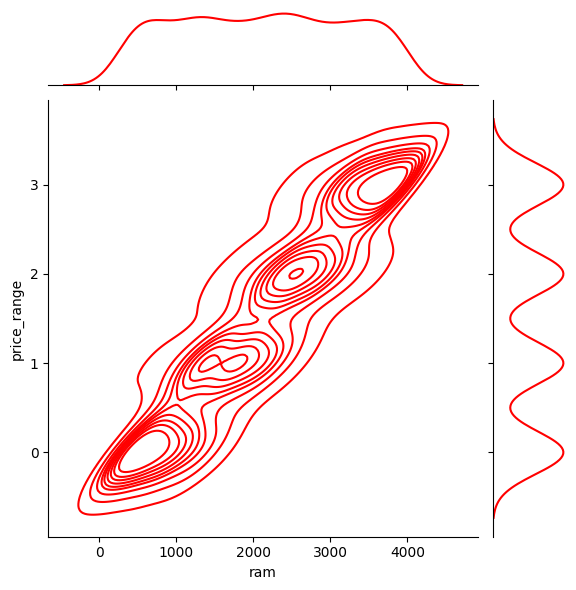

In [291]:
# RAM & price range

sns.jointplot(x='ram',y='price_range',data=train_data,color='red',kind='kde')

<AxesSubplot: xlabel='price_range', ylabel='int_memory'>

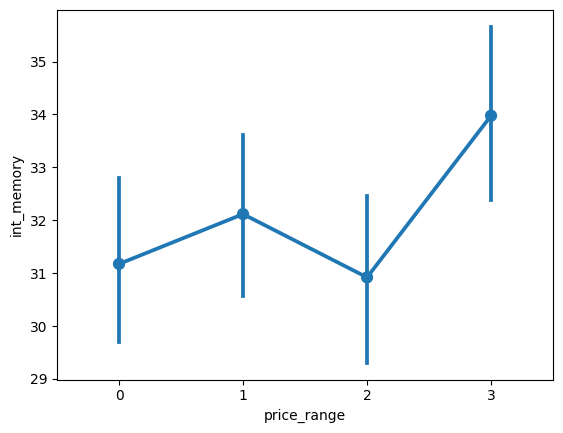

In [292]:
# Internal memory and price range

sns.pointplot(y="int_memory", x="price_range", data=train_data)

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

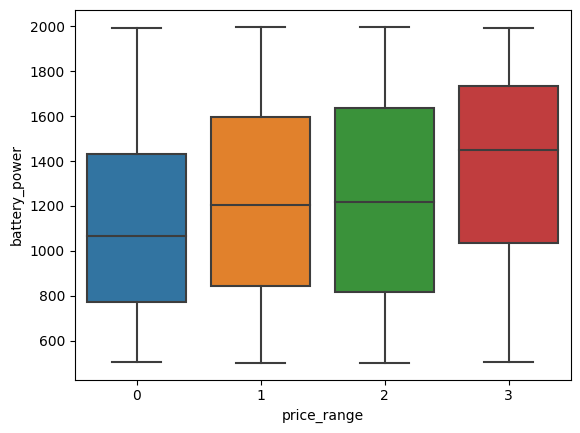

In [293]:
# Battery power vs price range

sns.boxplot(x="price_range", y="battery_power", data=train_data)

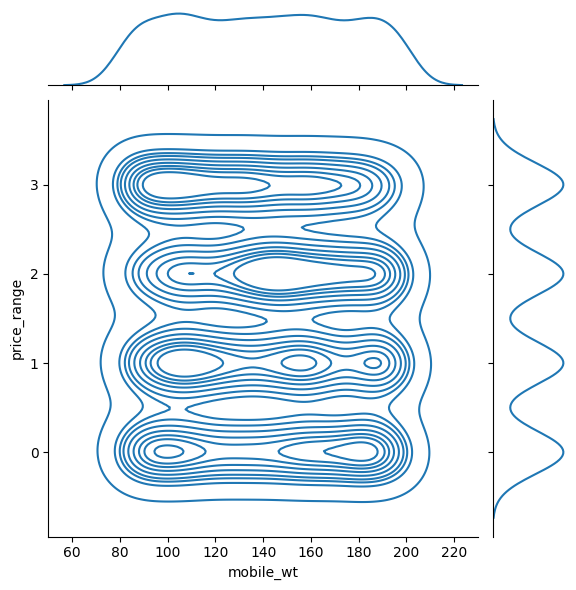

In [294]:
# Mobile weight vs price range

sns.jointplot(x='mobile_wt',y='price_range',data=train_data,kind='kde')

<AxesSubplot: xlabel='price_range', ylabel='talk_time'>

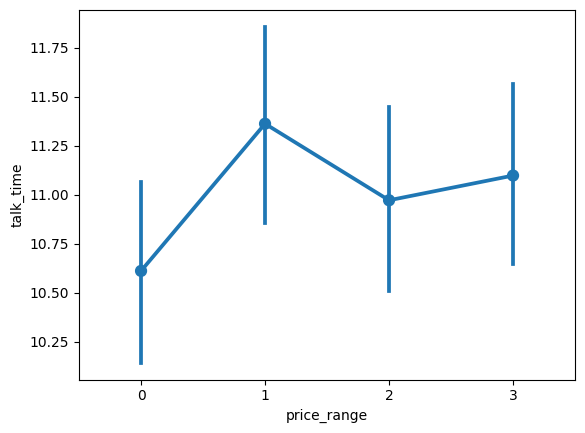

In [295]:
# Talk time vs price range

sns.pointplot(y="talk_time", x="price_range", data=train_data)

**Selecting prediction targets, features, and defining model**

In [296]:
# Prediction target y
y = train_data.price_range

# Selecting features X
column_list.remove("price_range")
price_range_features = column_list
x = train_data[price_range_features]

# Defining model
price_range_model = DecisionTreeRegressor(random_state=1)

# Fitting model
price_range_model.fit(x, y)

# Text representation of model
text_representation = tree.export_text(price_range_model)
#print(text_representation)

**Model validation**

In [297]:
'''split data into training and validation data, for both features and target
The split is based on a random number generator. Supplying a numeric value to
the random_state argument guarantees we get the same split every time we run this script.'''

train_X, val_X, train_y, val_y = train_test_split(x, y, random_state = 0)

# Fit model
price_range_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = price_range_model.predict(val_X)
MAE = mean_absolute_error(val_y, val_predictions)
print(MAE)
if MAE<0.3:
    print('This model is suitable')
else:
    print('Model will need improvement')

0.152
This model is suitable


**Applying to test dataset**

In [298]:
predicted_phone_prices = price_range_model.predict(test_data)
predicted_phone_prices = predicted_phone_prices.tolist()
print(predicted_phone_prices)
test_data["price_range"] = predicted_phone_prices
display(test_data)

[3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 1.0, 2.0, 1.0, 0.0, 2.0, 0.0, 3.0, 1.0, 3.0, 1.0, 1.0, 3.0, 3.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 0.0, 2.0, 1.0, 2.0, 3.0, 1.0, 3.0, 3.0, 0.0, 3.0, 0.0, 2.0, 1.0, 3.0, 0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 3.0, 1.0, 0.0, 0.0, 3.0, 1.0, 2.0, 0.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 0.0, 0.0, 3.0, 2.0, 1.0, 1.0, 0.0, 3.0, 2.0, 3.0, 2.0, 0.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 0.0, 3.0, 2.0, 1.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 0.0, 0.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0,

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3.0
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2.0
